In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
x = np.arange(0.0, 5.0, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

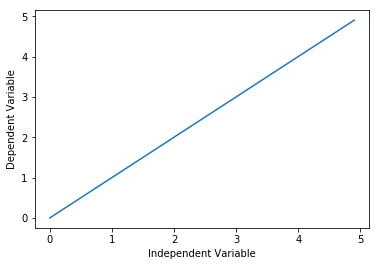

In [3]:
a = 1
b = 0

y = a*x + b

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [4]:
x_data = np.random.rand(100).astype(np.float32)

In [5]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [10]:
(x_data,y_data) [0:5]

(array([0.47103497, 0.53979367, 0.89457583, 0.5366635 , 0.50327116,
        0.3433358 , 0.37693042, 0.23875253, 0.22047661, 0.0296247 ,
        0.1214613 , 0.22539984, 0.69648385, 0.9220932 , 0.45489877,
        0.35056484, 0.13283132, 0.8333657 , 0.90453655, 0.8889045 ,
        0.7487811 , 0.11399868, 0.02835709, 0.18326162, 0.9025443 ,
        0.00185673, 0.09156045, 0.234133  , 0.898484  , 0.8926307 ,
        0.8897891 , 0.916972  , 0.9912045 , 0.45718962, 0.665694  ,
        0.9085962 , 0.13535719, 0.66706216, 0.5495636 , 0.6357606 ,
        0.42038298, 0.6126274 , 0.552088  , 0.8725364 , 0.03854585,
        0.4297066 , 0.8096665 , 0.3929748 , 0.45735264, 0.10406311,
        0.19091955, 0.00657504, 0.642644  , 0.0558229 , 0.2274151 ,
        0.48162904, 0.1652263 , 0.19808264, 0.93598676, 0.05133304,
        0.90048265, 0.45572245, 0.86035854, 0.2604999 , 0.5562007 ,
        0.38757357, 0.584923  , 0.28358796, 0.2769918 , 0.8002458 ,
        0.53185713, 0.51086515, 0.37428313, 0.74

In [11]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [13]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [14]:
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [16]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [17]:
train_data = []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step % 10 == 0:
        print(step,evals)
        train_data.append(evals)

0 [2.4541297, 2.9370992]
10 [2.5958426, 2.202646]
20 [2.7933376, 2.1031113]
30 [2.888893, 2.0549529]
40 [2.935126, 2.0316522]
50 [2.9574952, 2.0203786]
60 [2.9683182, 2.0149238]
70 [2.9735546, 2.0122848]
80 [2.976088, 2.0110078]
90 [2.9773142, 2.01039]


In [18]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0/len(train_data)
    cg -= 1.0/len(train_data)
    
    if cb > 1.0:cb = 1.0
    if cg < 0.0:cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data points')

plt.legend(handles = [green_line])

plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'